### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [82]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')

In [84]:
digits = datasets.load_digits()
print(digits.data.shape)
X = digits.data
y = digits.target
print(np.bincount(y))

(1797, 64)
[178 182 177 183 181 182 181 179 174 180]


In [85]:
np.random.randint(0, digits.data.shape[0], 1)

array([1076])

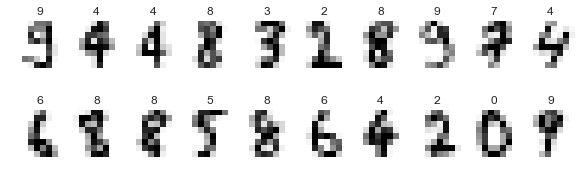

In [86]:
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(X[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(y[i])

# 評估分群模型的表現

In [87]:
def plot_confusion_matrix(confmat, target_names=None, title=None):
    plt.matshow(confmat, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            plt.text(x=j, y=i, s=f'{confmat[i][j]}', va='center', ha='center')

    if target_names is not None:
        plt.xticks(np.arange(len(target_names)), target_names)
        plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    plt.grid('off')
    plt.tight_layout()
    plt.savefig('fig.png', dpi=220, transparent=False, bbox_inches='tight')

Accuracy of test set = 0.958


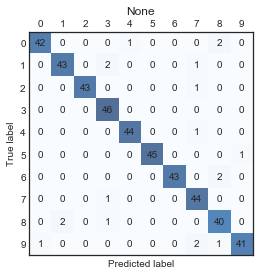

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy of test set = {accuracy_score(y_test, y_pred):.3f}")
plot_confusion_matrix(conf_mat, digits.target_names)

## 我們可以看到 45 個 5 被正確預測，42 個 8 被正確預測，但混淆矩陣並不是唯一的評估方式

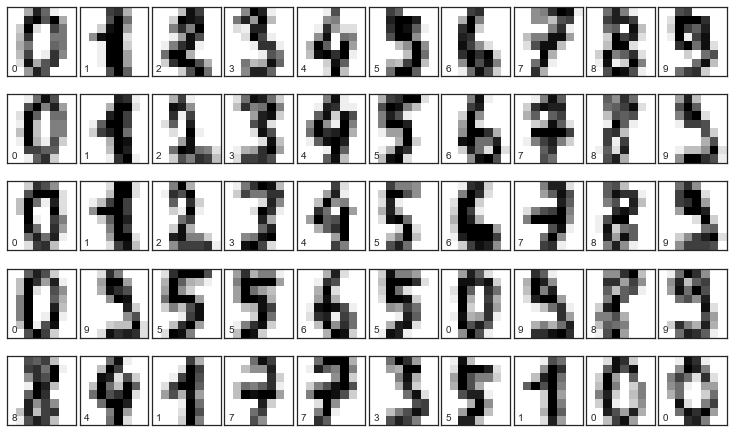

In [89]:
# 設定圖形的大小（寬, 高）
fig = plt.figure(figsize=(10, 6))

# 調整子圖形 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(50):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(5, 10, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

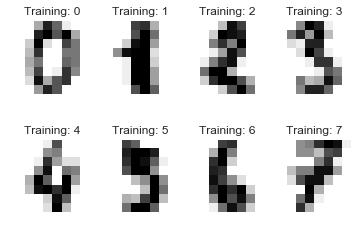

In [90]:
# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

# 將觀測值與目標值放入一個 list
images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:8]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 4, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))

# 顯示圖形
plt.show()

# 視覺化：主成份分析（Principal Component Analysis, PCA）
https://www.datacamp.com/community/tutorials/scikit-learn-python  
digits 資料有 64 個變數，面對這種高維度的資料  （實務上還有其他很多像是財務或者氣候資料也都屬於高維度資料）  
我們需要用一些方法找出特別重要的二到三個變數  
或者將許多的變數組合成讓我們更容易理解且視覺化的幾個維度。

這種方法稱作降維（Dimensionality Reduction），我們接著要使用其中一種方法稱為：主成份分析（Principal Component Analysis, PCA）  
來協助我們視覺化 digits 資料。主成份分析的精神在於找出變數之間的線性關係組成新的一個主成份  
然後使用這個主成份取代原有的變數，屬於一種最大化資料變異性的線性轉換方法

In [91]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")

# Print out the data
print("RPCA:")
print(reduced_data_rpca)
print("---")
print("PCA:")
print(reduced_data_pca)

Shape of reduced_data_pca: (1797, 2)
---
RPCA:
[[ -1.25343552  21.28041755]
 [  7.94549833 -20.76109636]
 [  6.97175837  -9.95712099]
 ...
 [ 10.80922248  -6.94748888]
 [ -4.86806085  12.43259344]
 [ -0.32582265   6.36318287]]
---
PCA:
[[ -1.25946949  21.27488279]
 [  7.95761274 -20.76869396]
 [  6.99192501  -9.95598856]
 ...
 [ 10.8012801   -6.96025759]
 [ -4.87210823  12.42394978]
 [ -0.34439415   6.36554018]]


# 我們在程式中指定降維成兩個主成份，確保可以使用散佈圖視覺化，並觀察用兩個主成份是否可以將不同的目標值區隔開：

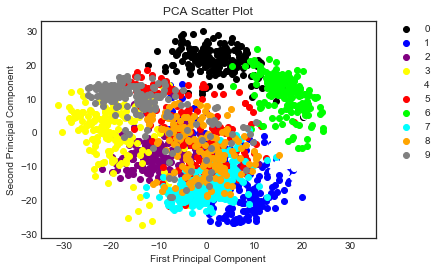

In [92]:
# from sklearn import datasets
digits = datasets.load_digits()
import matplotlib.pyplot as plt

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

# 在對資料本身有了一定認知後，我們必須思索的是如何應用，以及使用什麼樣的機器學習演算法來建立預測模型。
對資料的認知程度愈高，愈容易找到應用與合適的機器學習演算法。  
然而對於 scikit-learn 的初學者來說，這個套件的內容有點過於龐大，這時您可以參考scikit-learn 機器學習地圖來獲得額外的幫助。  
https://scikit-learn.org/stable/tutorial/machine_learning_map/

我們想要對 digits 資料使用非監督式學習演算法，在這個機器學習地圖上我們沿著  
資料超過 50 個觀測值（確認！）  
預測類別（確認！）  
沒有目標值（只要不使用 digits.target 即可，確認！）  
需要知道有幾個類別要預測（確認！）  
以及需要小於 1 萬個觀測值（確認！）  
我們可以順利應用 K-Means！

# K means
K-Means 演算法是最簡單且最廣泛被運用來解決分群問題的非監督式學習演算法。演算法首先隨意設定 k 個中心點，然後計算各個觀測值與這 k 個中心點的距離，然後將觀測值分配給距離最近的中心點貼上標籤，形成 k 個群集。接著這 k 個中心點的位置會被重新計算並移動到各個群集目前的中心，然後再重新計算各個觀測值與這 k 個中心點的距離，更新各個觀測值的群集標籤。前述的流程會重複進行，一直到各個觀測值的群集標籤穩定不更動為止。k 值由使用者指定，而一開始這 k 個中心點的位置則是隨機擺放，這些隨機擺放的位置會影響 K-Means 演算法的結果，可以透過設定 n-init 參數來處理這個問題

In [117]:
# Import
# 在開始使用 K-Means 演算法之前，我們應該先學習關於資料的預處理（Preprocessing）
# 透過標準化，我們將這 64 個維度的分佈轉換為平均數為 0，標準差為 1 的標準常態分佈。
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
data = scale(digits.data)

# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [118]:
print(f"X_train shape= {X_train.shape}")
print(f"X_test shape= {X_test.shape}")
print(f"images_train shape= {images_train.shape}")
# 現在訓練資料 X_train 有 1347 個觀測值，y_train 有 1347 個目標值，恰好是原始資料 digits 的 2/3；
# 而X_test 有 450 個觀測值，y_test 有 450 個目標值，恰好是原始資料 digits 的 1/3。

X_train shape= (1347, 64)
X_test shape= (450, 64)
images_train shape= (1347, 8, 8)


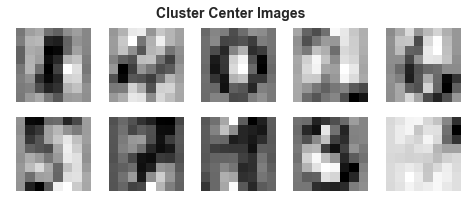

In [119]:
# 開始使用 K-Means 演算法，透過 cluster 模組的 KMeans() 方法來建立模型，
# 在這裡要注意三個參數：init、n_clusters 與 random_state。
# 您一定還記得 random_state，這個參數能夠確保我們每次執行這段程式得到的結果相同
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

#n_clusters 參數被設定為 10，這呼應了我們有 0 到 9 這 10 個相異目標值。假使在未知群集的情況下，通常會嘗試幾個不同的 n_clusters 參數值，分別計算平方誤差和（Sum of the Squared Errors, SSE），
# 然後選擇平方誤差和最小的那個 n_clusters 作為群集數，
# 換句話說就是讓各個群集中的每個觀測值到群集中心點的距離最小化。

# 載入 matplotlib
import matplotlib.pyplot as plt

# 設定圖形的大小
fig = plt.figure(figsize=(8, 3))

# 圖形標題
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# 對所有的目標值（0 - 9）
for i in range(10):
    # 在 2x5 的網格上繪製子圖形
    ax = fig.add_subplot(2, 5, i + 1)
    # 顯示圖片
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # 將座標軸刻度關掉
    plt.axis('off')

# 顯示圖形
plt.show()

In [120]:
clf.cluster_centers_.shape

(10, 64)

In [121]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


In [122]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.12


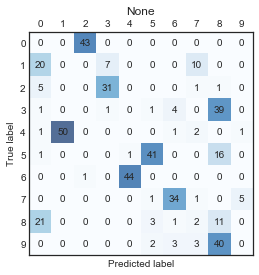

In [123]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
# print(metrics.confusion_matrix(y_test, y_pred))
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)

# 這次我們改用 Isomap() 來對 digits 資料進行降維，跟主成份分析不同的地方是 Isomap 屬於非線性的降維方法。

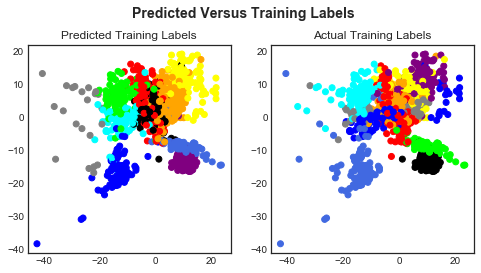

In [100]:
from sklearn.manifold import Isomap

# 使用 Isomap 對 `X_train` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

colors = ['black', 'blue', 'purple', 'yellow', 'royalblue', 'red', 'lime', 'cyan', 'orange', 'gray']

# # 加入散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=[colors[i] for i in clusters])
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=[colors[i] for i in y_train])
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [101]:
X_iso.shape

(1347, 2)

In [102]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


In [103]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.12


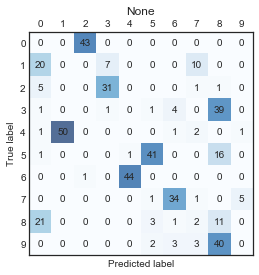

In [104]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
# print(metrics.confusion_matrix(y_test, y_pred))
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)

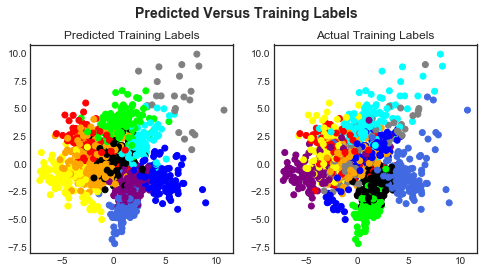

In [105]:
# 建立 K-Means 模型
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
import numpy as np
from sklearn import cluster
# 載入 `PCA()`
from sklearn.decomposition import PCA

# 使用 PCA 對 `X_train` 資料降維
X_pca = PCA(n_components=2).fit_transform(X_train)

# 使用 K-Means 演算法
clusters = clf.fit_predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整圖形的外觀
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

colors = ['black', 'blue', 'purple', 'yellow', 'royalblue', 'red', 'lime', 'cyan', 'orange', 'gray']

# 加入散佈圖 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in clusters])
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[i] for i in y_train])
ax[1].set_title('Actual Training Labels')

# 顯示圖形
plt.show()

In [106]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


In [107]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.12


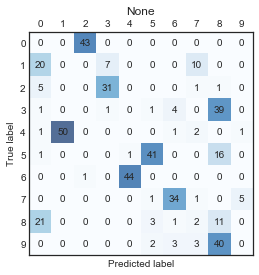

In [108]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
# print(metrics.confusion_matrix(y_test, y_pred))
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)

# 嘗試另外一種演算法：支持向量機（Support Vector Machines, SVM）
當訓練資料沒有目標值的時候適用前述的分群演算法，當訓練資料具有目標值的時候就能夠適用分類演算法。我們再回顧一下 scikit-learn 機器學習地圖，在分類演算的區域第一個看到的是線性 SVC  
https://github.com/kgfish7105/ML100-Days/blob/master/homework/Day_044_HW.ipynb

In [124]:
# Import `train_test_split`
from sklearn.cross_validation import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
# 在這段程式中我們手動設定了 gamma 參數，但其實透過網格搜索（Grid search）或交叉驗證（Cross validation）都可以自動找出合適的參數設定，
# 但這些方法並不是這份教學的重點，所以我們只是很快地展示一下如何使用網格搜索來調整參數而不去深究
# Split the `digits` data into two equal sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

# Import GridSearchCV
from sklearn.grid_search import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9810690423162584
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


## 在使用網格搜索以前，我們將 kernel 參數指定為 linear，
在 SVM 演算法 kernel 參數預設為 rbf，而除了前面指定的 linear，尚可以設定為 poly。但是究竟 kernel 是什麼？
kernel 是一種計算訓練資料觀測值相似度的函數，SVM 演算法利用這個函數來進行分類，
我們先假設這些觀測值線性可分，所以設定 kernel = linear，但是網格搜索的結果則建議我們使用 kernel = rbf 的參數設定。

In [126]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9877641824249166

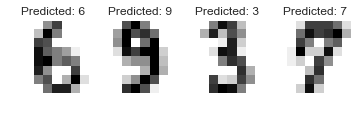

In [127]:
# 使用 SVC 演算法
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn import cluster
digits = datasets.load_digits()
data = scale(digits.data)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)
from sklearn import svm
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

# 載入 matplotlib
import matplotlib.pyplot as plt

# 將預測結果指派給 `predicted`
predicted = svc_model.predict(X_test)

# 將 `images_test` 與 `predicted` 存入 `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# 繪製前四個元素
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # 在 1x4 的網格上繪製子圖形
    plt.subplot(1, 4, index + 1)
    # 關掉座標軸的刻度
    plt.axis('off')
    # 色彩用灰階
    plt.imshow(image, cmap=plt.cm.binary)
    # 加入標題
    plt.title('Predicted: ' + str(prediction))

# 顯示圖形
plt.show()

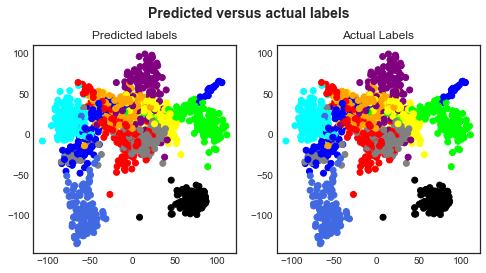

In [113]:
# 對 `digits` 資料降維
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# 使用 SVC 演算法
predicted = svc_model.predict(X_train)

# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# 調整外觀
fig.subplots_adjust(top=0.85)

colors = ['black', 'blue', 'purple', 'yellow', 'royalblue', 'red', 'lime', 'cyan', 'orange', 'gray']

# 繪製散佈圖 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=[colors[i] for i in predicted])
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=[colors[i] for i in y_train])
ax[1].set_title('Actual Labels')

# 加入標題
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# 顯示圖形
plt.show()

In [114]:
# Predict the labels for `X_test`
y_pred=svc_model.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]


In [115]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9822222222222222


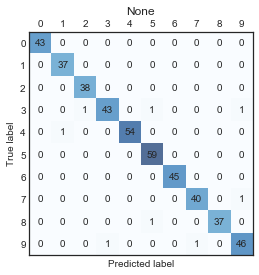

In [116]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
# print(metrics.confusion_matrix(y_test, y_pred))
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)

In [80]:
# conf_mat.sum()
# (y_test==1).sum()
(y_test==5).sum()
(y_pred==5).sum()
# conf_mat

61